In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.nsga import NSGeneticAlgorithm
from src.crossovers import mean_crossover
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 300
DIMENSION_SIZE = 2
CONSTRAINTS = (-4, 4)
RANDOM_STATE = 100

In [3]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

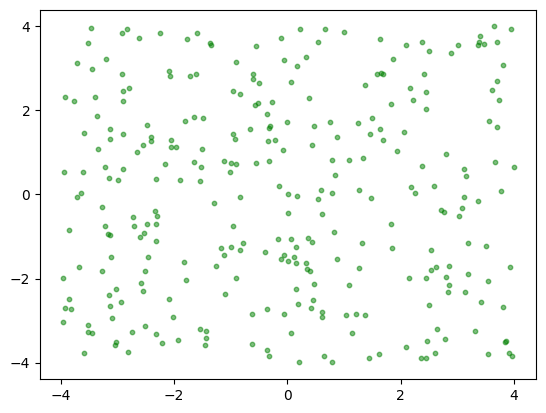

In [4]:
x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [5]:
from typing import Sequence

def function_1(pop: Sequence[float]):
    first = np.power(pop - 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

def function_2(pop: Sequence[float]):
    first = np.power(pop + 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

function_1([3, 4])
function_2([3, 4])

0.9999999999999998

In [6]:
algo = NSGeneticAlgorithm(
    state=current_state,
    eval_functions=[function_1, function_2],
    mutation_function=square_mutation,
    mating_function=mean_crossover,
)

In [7]:
algo.get_best()

[[0.790747015427943, 0.8304363123428287],
 [-0.8423977064813162, -0.06266424079080046],
 [0.004914555543625632, -0.4385869693508937],
 [0.8408962841454324, 0.4737382661443208],
 [0.1749743825967176, -0.033424112770636505],
 [-0.16244990958658434, -1.0587462257717721],
 [0.5958067361867077, 0.10293014475030127],
 [0.014508749484249073, 0.01380897353291477],
 [-0.9519418351435753, -0.7541237394188087],
 [0.5483917169462638, -0.11432105514578161]]

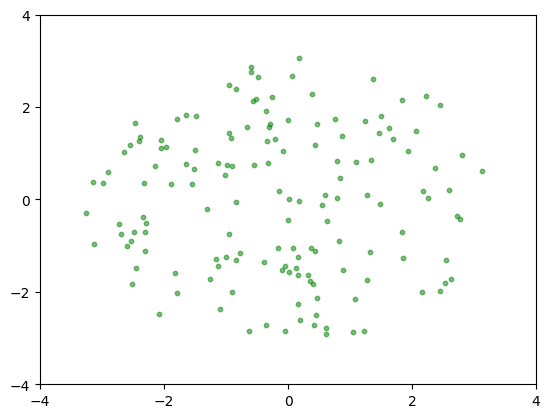

In [8]:
algo.select(keep_share=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

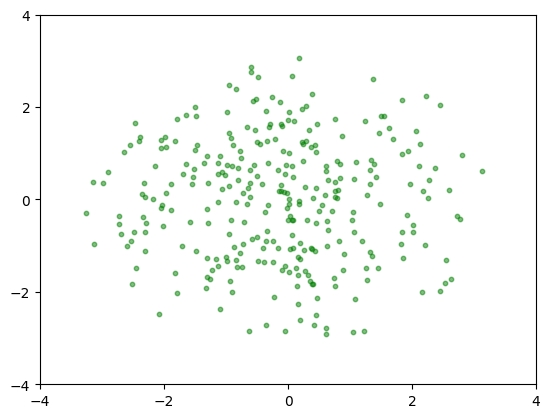

In [9]:
algo.mate()

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

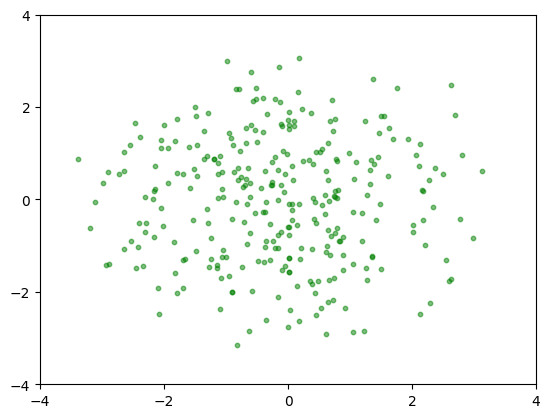

In [10]:
algo.mutate(delta=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [11]:
algo.get_best()

[[0.5958067361867077, 0.10293014475030127],
 [-0.40465893118133844, -0.28134037836450687],
 [-0.3514343598681553, -0.05431457307247467],
 [-0.6220771466662893, -0.726246143191098],
 [0.6397762040111403, 0.4267569400705904],
 [0.7636390870588077, 0.1765000513328081],
 [0.06769075895590726, -0.10180963051311431],
 [-0.16087792798208356, -0.01958678324132479],
 [-0.28643215344530415, -0.5372996905385244],
 [0.07139655543583712, 0.4149086773279568],
 [0.6151823551848739, 0.6061631322486267],
 [0.01602625146326231, -0.10187620033127409],
 [0.43860532758232706, -0.06009478851816419],
 [-0.3772849059294381, -0.2631430563545196],
 [-0.12062229919170209, 0.31690695582451056],
 [-0.06290169471711593, 0.17014491905503348],
 [-0.7138002106330137, -0.49544485409623196],
 [0.4045294976392624, 0.02439829170148755],
 [-0.5269016174901696, -0.30301762892212025],
 [0.17746877859372923, -0.10231237680115512],
 [0.06446864294163501, -0.22104717937013008]]

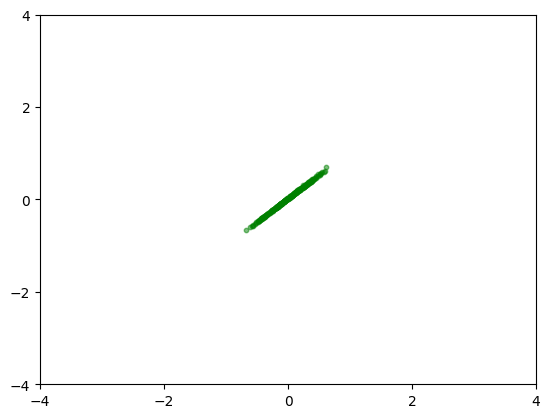

In [12]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [13]:
algo.get_best()

[[0.606030799304522, 0.7002739341787689],
 [-0.6750748922130002, -0.6564154470898863],
 [-0.6083546176162583, -0.5903873757626501],
 [-0.23000517824102867, -0.20463321946836718],
 [-0.15124602748273844, -0.12729040651914633],
 [-0.3007277658285631, -0.28994898837809646],
 [-0.24276255650766124, -0.22300166017340395],
 [0.3495745237504939, 0.386426973287019],
 [-0.059301753518991085, -0.03417602551873543],
 [-0.5647892315406673, -0.5516179819792232],
 [0.009602987341313002, 0.021524300197370512],
 [-0.13641606530849448, -0.11808698900636584],
 [0.17448013553502784, 0.21479784779144487],
 [0.28573786192281303, 0.3162421404293838],
 [0.5892290640254217, 0.6138665589226551],
 [-0.10929357453047432, -0.08291605036009433],
 [0.5513880780693801, 0.5989526150476784],
 [-0.15867368653599367, -0.13641525859037143],
 [0.34886558631327586, 0.3764372427722516],
 [0.41701232205135425, 0.442432764740884],
 [0.15650181351597464, 0.18394271110062646],
 [-0.5346599727357106, -0.5271349966412829],
 [0.21